# **Part A: Probabilistic Gaussian Generative Classifier**
---

## **A1. Dataset and Setup**
- ### **Import Needed Functions**


In [23]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


---
- ### **Load the full dataset (features X and labels y).**


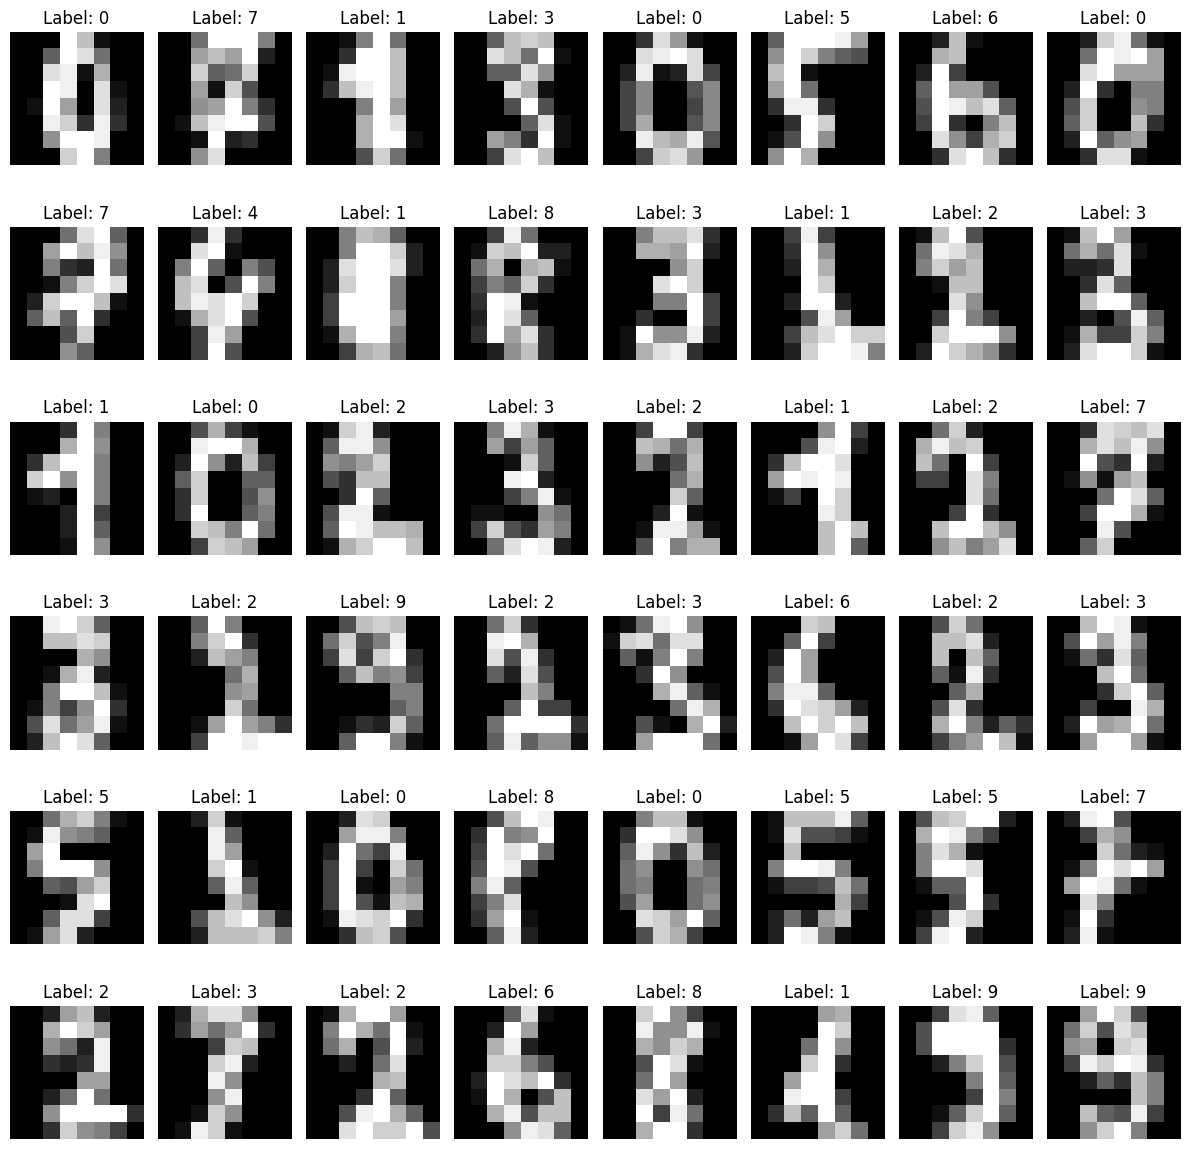

In [17]:
# Load the dataset
train_data = sklearn.datasets.load_digits()
X = train_data.data
y = train_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, stratify=y_test, random_state=42)

# display all images with their labels from the training set
fig, axes = plt.subplots(6, 8, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


- **standardize the features (for example, using StandardScaler from scikit-learn).**

In [31]:
# Data Preprocessing: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed!")

Data preprocessing completed!


---
---
## **A2. Gaussian Generative Model**
1. **Estimate the class priors π_k:**
2. **Estimate the class means μ_k**
3. **Estimate the shared covariance matrix Σ**
4. **Regularise the covariance**

In [ ]:
# Estimate class prior probabilities π_k
def estimate_class_priors(y):
    classes, counts = np.unique(y, return_counts=True)
    priors = counts / len(y)
    return dict(zip(classes, priors))

# Estimate class means μ_k
def estimate_class_means(X, y):
    class_means = {}
    classes = np.unique(y)
    
    for cls in classes:
        class_data = X[y == cls]
        class_means[cls] = np.mean(class_data, axis=0)

    return class_means

# Estimate shared Covariance matrix Σ
def estimate_shared_covariance(X, y, class_means):
    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))
    covariance = np.zeros((n_features, n_features))
    
    for cls in np.unique(y):
        class_data = X[y == cls]
        diff = class_data - class_means[cls]
        covariance += np.dot(diff.T, diff)
    
    covariance /= (n_samples - n_classes)
    return covariance

# Regularize Covariance matrix
def regularize_covariance(covariance, lambda_reg=1e-5):
    n, m = covariance.shape
    return covariance + lambda_reg * np.eye(n, m)

# Predict using Gaussian Discriminant Analysis
def predict_class_GDA(x,y, class_priors, class_means, covariance):
    classes = np.unique(y)
    probabilities = []
    inv_cov = np.linalg.inv(covariance)
    det_cov = np.linalg.det(covariance)
    
    for cls in classes:
        prior = class_priors[cls]
        mean = class_means[cls]
        diff = x - mean
        log_prob = (
            np.log(prior)
            - 0.5 * np.log(det_cov)
            - 0.5 * diff.T @ inv_cov @ diff
        )
        probabilities.append(log_prob)
    
    return classes[np.argmax(probabilities)]

### **Gaussian Discriminant Analysis (GDA)**

- **Class Priors (π_k):** estimated from `y_train`  
- **Class Means (μ_k):** computed per class  
- **Shared Covariance (Σ):** estimated and regularized  
- **Prediction:** first validation sample classified using GDA

In [58]:
π_k = estimate_class_priors(y_train)
print("Class Priors:", π_k)

μ_k = estimate_class_means(X_train_scaled, y_train)
print("Class Means calculated.", μ_k.keys())

Σ = estimate_shared_covariance(X_train_scaled, y_train, μ_k)
Σ_reg = regularize_covariance(Σ)

print(f"predicted label of first validation sample: {predict_class_GDA(X_train_scaled[6],y_train, π_k, μ_k, Σ_reg)}")

Class Priors: {np.int64(0): np.float64(0.09864757358790771), np.int64(1): np.float64(0.10103420843277645), np.int64(2): np.float64(0.09864757358790771), np.int64(3): np.float64(0.10182975338106603), np.int64(4): np.float64(0.10103420843277645), np.int64(5): np.float64(0.10103420843277645), np.int64(6): np.float64(0.10103420843277645), np.int64(7): np.float64(0.09944311853619729), np.int64(8): np.float64(0.09705648369132856), np.int64(9): np.float64(0.10023866348448687)}
Class Means calculated. dict_keys([np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)])
predicted label of first validation sample: 6
